In [3]:
import pandas as pd
import glob

In [8]:
path = "../Data/Uber_Movement/Monthly/"
extension = 'csv'
UM_monthly_files_all = [i for i in glob.glob(path + '*.{}'.format(extension))]
# print(len(UM_monthly_files_all))
UM_monthly_data = pd.concat([pd.read_csv(f, index_col = None, header = 0) for f in UM_monthly_files_all], axis = 0, ignore_index = True)

In [10]:
UM_monthly_data.shape

(3143535, 7)

In [11]:
UM_monthly_data.head()

,sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,166,139,4,2615.30,916.63,2449.80,1.45
1,28,130,4,1939.36,566.48,1858.46,1.36
2,181,88,4,2393.13,925.83,2204.99,1.52
3,25,34,4,1597.22,550.64,1510.31,1.40
4,34,139,4,3371.34,831.90,3261.61,1.30


In [12]:
rainfall_monthly_average = [1, 
                            7.5, 
                            22.6, 
                            85.6, 
                            124.8, 
                            94.8, 
                            138.3, 
                            170, 
                            176.6, 
                            116.9, 
                            79.2, 
                            11.2]

In [25]:
UM_monthly_average = list(UM_monthly_data.groupby('month')['mean_travel_time'].mean())
lower, upper = 0, 200
mini = min(UM_monthly_average)
maxi= max(UM_monthly_average)
UM_monthly_average_normalized = [lower + (upper-lower)*((x-mini)/(maxi-mini)) for x in UM_monthly_average]
print(UM_monthly_average_normalized)

[49.28594283624604, 74.38716073315021, 0.0, 19.266708958268186, 101.83608607136243, 200.0, 134.63020419554675, 171.30734901432953, 163.89782486687125, 141.9113595133244, 92.2021463701452, 125.50433178846379]


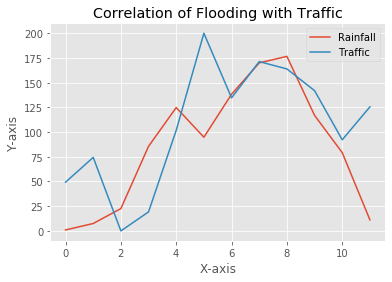

In [26]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rainfall_monthly_average, label = 'Rainfall')
plt.plot(UM_monthly_average_normalized, label = 'Traffic')
 
plt.title("Correlation of Flooding with Traffic")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
 
plt.legend()
plt.show()

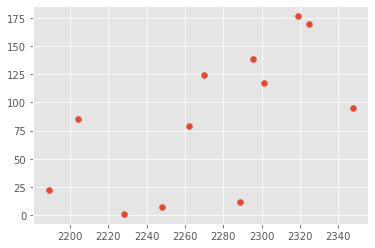

In [27]:
matplotlib.style.use('ggplot')

plt.scatter(UM_monthly_average, rainfall_monthly_average)
plt.show()